In [127]:
import warnings

warnings.filterwarnings(action='ignore')

In [128]:
import numpy as np
import pandas as pd

In [129]:
df = pd.read_csv('data/auto-mpg.csv')

In [130]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [132]:
df.drop(['origin'], axis=1, inplace=True)

In [133]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [134]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [135]:
df = df.dropna(axis=0)

In [136]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [137]:
df['cylinders'] = df['cylinders'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')
df['weight'] = df['weight'].astype('float64')
df['model_year'] = df['model_year'].astype('float64')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   car_name      392 non-null    object 
dtypes: float64(7), object(1)
memory usage: 27.6+ KB


### 그래프 1

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
x_features = X_train.columns.to_list()
x_features

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

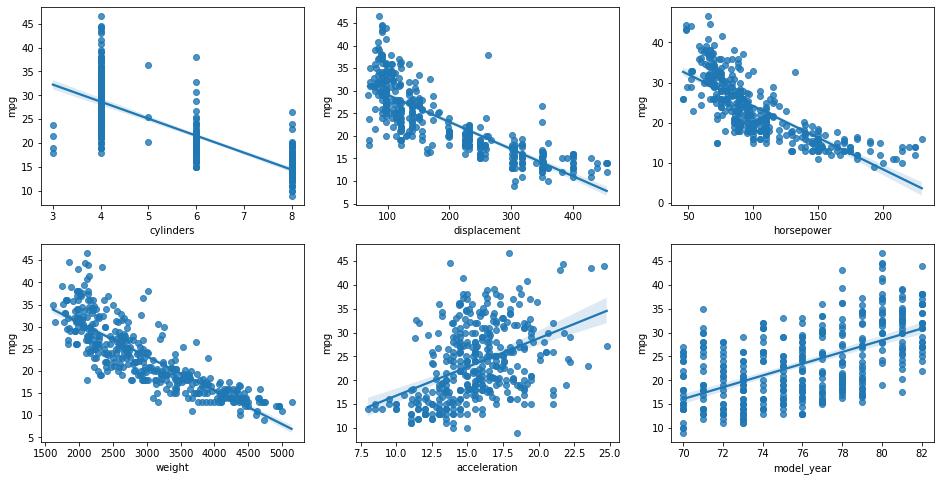

In [141]:
fig, axs = plt.subplots(figsize=(16,8), ncols=3, nrows=2)

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=df, ax=axs[row][col])

### 분석 모델 구축

In [142]:
y = df['mpg'] # 정답
x = df.loc[:,'cylinders':'model_year'] # 문제

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=156)

In [145]:
lr = LinearRegression()

In [146]:
lr.fit(X_train, Y_train)

LinearRegression()

### Test (mse, rsme, r2)

In [147]:
test_predict = lr.predict(X_test)

In [148]:
test_mse = mean_squared_error(Y_test, test_predict)
test_mse

15.221923496980558

In [149]:
test_rsme = np.sqrt(test_mse)
test_rsme

3.9015283539890566

In [150]:
test_r2 = r2_score(Y_test, test_predict)
test_r2

0.7776990375488635

### Train (mse, rsme, r2)

In [151]:
train_predict = lr.predict(X_train)

In [152]:
train_mse = mean_squared_error(Y_train, train_predict)
train_mse

10.205106159426908

In [153]:
train_rsme = np.sqrt(train_mse)
train_rsme

3.194543184780401

In [154]:
train_r2 = r2_score(Y_train, train_predict)
train_r2

0.8220093378634397

### 정보입력

In [161]:
cylinders = input('cylinders >>')
displacement = input('displacement >>')
horsepower = input('horsepower >>')
weight = input('weight >>')
acceleration = input('acceleration >>')
model_year = input('model_year >>')

# ['6', '220', '120', '3200', '10', '75']

cylinders >>6
displacement >>220
horsepower >>120
weight >>3200
acceleration >>10
model_year >>75


In [162]:
input_list=[cylinders,displacement,horsepower,weight,acceleration,model_year]

In [163]:
input_list

['6', '220', '120', '3200', '10', '75']

In [164]:
data_list = [list(map(lambda x: float(x), input_list))]
data_list

[[6.0, 220.0, 120.0, 3200.0, 10.0, 75.0]]

In [166]:
print('해당 차량의 연비는 {0:.1f}'.format(lr.predict(data_list)[0]), '입니다')

해당 차량의 연비는 21.1 입니다


### 그래프 2

In [175]:
df_eval = ['mse', 'rsme', 'r2']*2
df_list = [train_mse, train_rsme, train_r2, test_mse, test_rsme, test_r2]
df_kind = ['train', 'train', 'train', 'test', 'test', 'test']

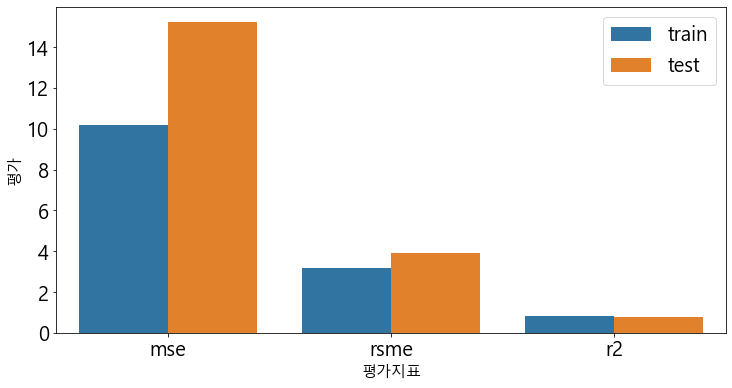

In [183]:
df2 = pd.DataFrame({'평가지표':df_eval, '평가지수':df_list, '종류':df_kind})
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 6))
df2_sns = sns.barplot(data=df2, x='평가지표', y='평가지수', hue='종류')
df2_sns.set_xlabel('평가지표', fontsize=15)
df2_sns.set_ylabel('평가', fontsize=15)
df2_sns.tick_params(labelsize=20)
df2_sns.legend(fontsize=20)
# plt.xticks(rotation=45)
plt.show()